# Ego network of a Instagram user

## Conceptual Model

An ego network is a portion of the network from the persective of a single actor, the network is represented as a directed graph (so we are representing a network as Twitter where there could be an asymmetry between actors). Essentialy we are representing only the links that involve our focal actor. We suppose that the focal actor reprents an instragram user that we are interested in while the other actors are users following or being followed by the subject himself. the outgoing links represent the relationships with people followed by our ego while the ingoing edges viceversa.

in order to have a truthful representation we added the blue colour when in presence of reciprocal connection. furthermore the red arrows stand for the outcoming edges and the green ones are the incoming edges. 

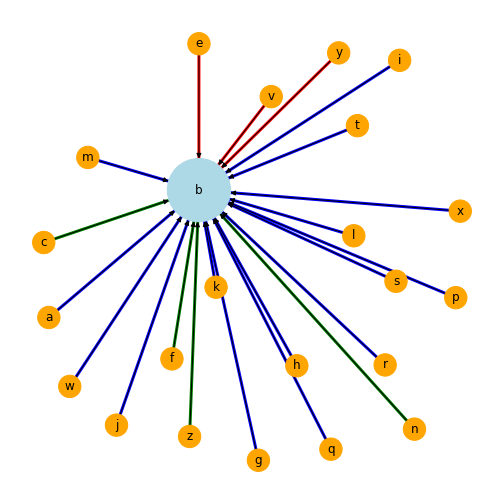

In [1]:
from IPython.display import Image
Image(filename='Graph_1.png') 

## Logical Model

Our graph is a dictionary in which the keys are the actors of our network and the values associated with the keys are a list containing all the out coming edges. The pshycal representation of our final ego network will be a csv file having as fields: the name of our focal actor, a list of the incoming edges, a list of the outcoming edges.

# Code

In [2]:
class Ego_Network:
    
    " Ego network: once specified the numbers of connection between the actors (actors   \
      this case the letters from a to z) the code will genereate n number of links       \
      betwen them(default = 150) and then with the function ego_chal it will return    \
      the plot of the ego network of that particular actor and some statistic of that network "
    
    def __init__(self, n_of_actors=150, seed=42):
        rd.seed(seed)
        if type(n_of_actors)!= int or type(seed)!= int:
            raise ValueError("Must be an integer")
        else:
            self._network = nx.DiGraph()
            # creating the nodes
            for iel in range(97,122):
                self._network.add_node(chr(iel))
            # creating random connections
            for iel in range(n_of_actors):
                x,y = chr(rd.randint(97, 122)), chr(rd.randint(97, 122))
                if x != y:
                    self._network.add_edge(x,y)
    
    def ego_chal(self, letter = "b"):
        self._ego = letter
        # some general information
        in_edges = [x[0] for x in (list(self._network.in_edges(letter)))]
        edges = [x[1] for x in (list(self._network.edges(letter)))]
        print("the ego that whe are looking for is - {} -".format(letter.upper()))
        print("the incoming edge are {}, so has indegree= {}".format(in_edges, len(in_edges)))
        print("the outcoming edge are {}, so has outdegree= {}".format(edges, len(edges)))
        print("the total degree is= {}". format( len(in_edges)+len(edges)))
        print("\nRed edges are the outcoming edge, the green ones are the incoming edges while the blue ones means that they are connected each other.")
        ### create the graph which regard only the Ego
        the_new_ego_graph = nx.DiGraph()
        for tupla in self._network.in_edges(letter):
            the_new_ego_graph.add_edge(list(tupla)[0],list(tupla)[1])
        for tupla in self._network.edges(letter):
            the_new_ego_graph.add_edge(list(tupla)[1],list(tupla)[0])
        # creating a list of color to mark the Ego
        size = []
        color = []
        for key in the_new_ego_graph:
            if key != self._ego:
                color.append("orange")
                size.append(500)
            else:
                size.append(4000)
                color.append("lightblue")
        #plot the nodes
        plt.figure(3,figsize=(7,7))
        pos=nx.spring_layout(the_new_ego_graph)
        nx.draw(the_new_ego_graph, pos, cmap=plt.get_cmap('jet'),\
                               node_color = color, node_size = size)
        nx.draw_networkx_labels(the_new_ego_graph, pos)
        # plot the edges
        incoming_edge = list(self._network.in_edges(letter))
        out_edge = list(self._network.out_edges(letter))
        out_edge2 = list(self._network.edges(letter))
        new_in = incoming_edge[:]
        new_out = out_edge2[:]
        both = []
        for out in out_edge2:
            for in_ in new_in:
                if out[1] == in_[0]:
                    both.append((out[1], in_[1]))
                    new_out.remove(out)
                    new_in.remove(in_)
        nx.draw_networkx_edges(the_new_ego_graph, pos, edgelist=new_in, edge_color='green', arrows=False,width= 3, labels="In")
        nx.draw_networkx_edges(the_new_ego_graph, pos, edgelist=new_out,edge_color="red" ,arrows=False, width=3, labels="Out")
        nx.draw_networkx_edges(the_new_ego_graph, pos, edgelist=both,edge_color="blue" ,arrows=False, width=3, labels="Out")
        #plt.savefig("Graph"+letter+".png", format="PNG")
         
    def plot_all_network(self):
        dim = [1000]*len(self._network.nodes())
        plt.figure(3,figsize=(15,15))
        pos=nx.spring_layout(self._network)
        nx.draw(self._network, pos, cmap=plt.get_cmap('jet'),node_size=dim)
        nx.draw_networkx_labels(self._network, pos)
        
    def creating_csv(self, letter):
        self._ego = letter
        in_edges = [x[0] for x in (list(self._network.in_edges(letter)))]
        edges = [x[1] for x in (list(self._network.edges(letter)))]
        return(self._ego.upper(), in_edges,edges)
        

## Creating the dataframe (csv format)

In [3]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
My_networx=Ego_Network(700, seed=40)
res = []
for iel in range(97,122):
    letter, incoming, out = My_networx.creating_csv(chr(iel))
    uno = set(incoming)
    due = set(out)
    n = uno^due 
    res.append([letter,incoming,out, len(n)])
df = pd.DataFrame()
for iel in range(len(res)):
    row = dict(Ego_actor=res[iel][0], Incoming_edges=res[iel][1], Outcoming_edges = res[iel][2], Total_n_of_actor_involved=int(res[iel][3]))
    df = df.append(row, ignore_index=True)

In [4]:
df.head()

,Ego_actor,Incoming_edges,Outcoming_edges,Total_n_of_actor_involved
0,A,"[j, r, i, x, e, v, m, l, y, t, u, b, p, d]","[q, c, n, j, i, g, h, f, s, x, u, k, z, d, m, ...",14.0
1,B,"[q, n, h, y, x, d, s, g, v, z, p, u, t, i, c]","[u, f, z, s, v, t, x, i, m, o, q, g, y, r, a]",10.0
2,C,"[q, a, h, x, p, s, d, n, i, u, r, v, w, k, g]","[f, t, w, h, s, d, o, m, q, i, b, r, p, n, y, ...",12.0
3,D,"[k, q, j, o, p, t, s, n, c, e, l, a, v, u, y, ...","[p, b, f, g, j, c, n, v, l, r, x, w, s, y, q, ...",11.0
4,E,"[x, y, r, m, w, k, t, u, z, p, f, i, g, l, q, ...","[y, z, j, t, m, s, r, h, i, a, d, p, x, n, f, q]",10.0


In [5]:
df.to_csv("ego network.csv",index= False)

The function ego_chal return some information about a specific actor and plot the interested ego network.

the ego that whe are looking for is - H -
the incoming edge are ['g', 'q', 'a', 'n', 'z', 'w', 'p', 'e', 'o', 'c', 't', 'k', 'l', 'x', 's'], so has indegree= 15
the outcoming edge are ['j', 'x', 'c', 'b', 'f', 'o', 'n', 'p', 'g', 'v', 'l', 'r', 'z', 'k', 'm', 'y', 'e', 'q'], so has outdegree= 18
the total degree is= 33

Red edges are the outcoming edge, the green ones are the incoming edges while the blue ones means that they are connected each other.


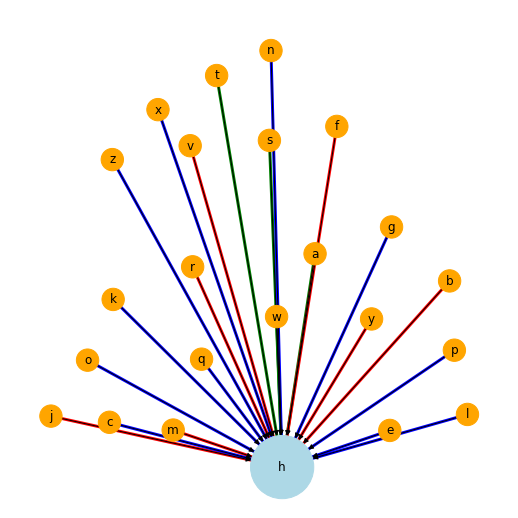

In [6]:
My_networx.ego_chal("h") 

the ego that whe are looking for is - Q -
the incoming edge are ['a', 'f', 'p', 'j', 'k', 's', 'o', 'm', 'n', 'z', 'w', 'r', 'c', 'i', 'b', 'd', 'l', 'e', 'h'], so has indegree= 19
the outcoming edge are ['b', 'v', 'd', 'c', 'h', 'i', 't', 'p', 'l', 'o', 'f', 'u', 'k', 'y', 'r', 'e'], so has outdegree= 16
the total degree is= 35

Red edges are the outcoming edge, the green ones are the incoming edges while the blue ones means that they are connected each other.


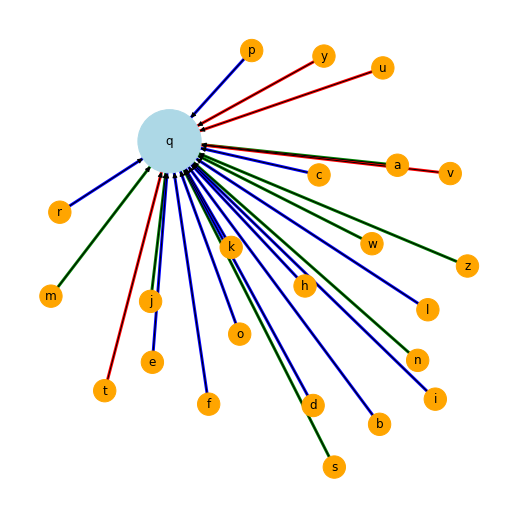

In [7]:
My_networx.ego_chal("q")

This is the entire network from which we extract the ego network of particular actors.

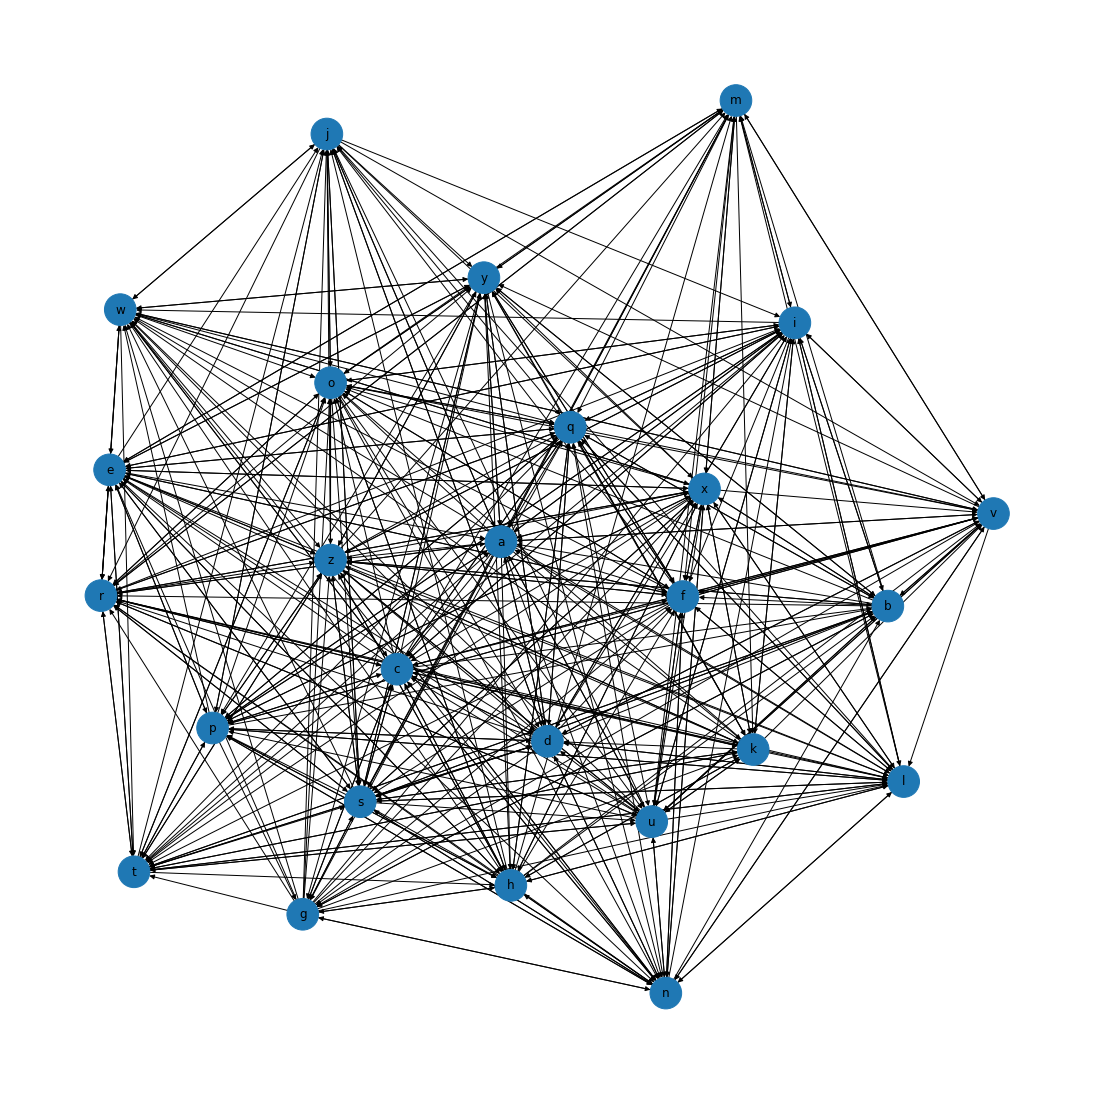

In [8]:
My_networx.plot_all_network()

In [9]:
pd.read_csv("ego network.csv")

,Ego_actor,Incoming_edges,Outcoming_edges,Total_n_of_actor_involved
0,A,"['j', 'r', 'i', 'x', 'e', 'v', 'm', 'l', 'y', ...","['q', 'c', 'n', 'j', 'i', 'g', 'h', 'f', 's', ...",14.0
1,B,"['q', 'n', 'h', 'y', 'x', 'd', 's', 'g', 'v', ...","['u', 'f', 'z', 's', 'v', 't', 'x', 'i', 'm', ...",10.0
2,C,"['q', 'a', 'h', 'x', 'p', 's', 'd', 'n', 'i', ...","['f', 't', 'w', 'h', 's', 'd', 'o', 'm', 'q', ...",12.0
3,D,"['k', 'q', 'j', 'o', 'p', 't', 's', 'n', 'c', ...","['p', 'b', 'f', 'g', 'j', 'c', 'n', 'v', 'l', ...",11.0
4,E,"['x', 'y', 'r', 'm', 'w', 'k', 't', 'u', 'z', ...","['y', 'z', 'j', 't', 'm', 's', 'r', 'h', 'i', ...",10.0
5,F,"['b', 'z', 'm', 'g', 'c', 'h', 'd', 'y', 'x', ...","['q', 's', 'j', 'y', 'u', 't', 'w', 'v', 'o', ...",12.0
6,G,"['v', 's', 'y', 'a', 'd', 'p', 'h', 'n', 'b', ...","['t', 'h', 's', 'f', 'n', 'w', 'k', 'b', 'l', ...",17.0
7,H,"['g', 'q', 'a', 'n', 'z', 'w', 'p', 'e', 'o', ...","['j', 'x', 'c', 'b', 'f', 'o', 'n', 'p', 'g', ...",11.0
8,I,"['l', 'q', 'a', 'p', 'b', 'e', 'g', 'n', 'z', ...","['k', 'v', 'u', 'a', 'c', 'z', 'o', 'b', 'q', ...",7.0
9,J,"['h', 'e', 'f', 'p', 'a', 'l', 'd', 'z', 's', ...","['w', 'o', 'd', 'r', 'q', 'a', 'p', 's', 'y', ...",14.0
